# 4. 신경망 학습

- **학습(Training)** 이란 훈련 데이터로 부터 가중치 매개변수의 최적값을 자동으로 획득하는 것
- **손실함수(Lost Function)** 는 신경망이 학습할 수 있도록 해주는 지표이며, 손실함수의 결과값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표

---
## 4.1 데이터에서 학습한다!
- **기계학습은 데이터가 생명** : 데이터에서 답을 찾고, 데이터에서 패턴을 발견하고, 데이터로 이야기를 만드는 것이 기계학습. <br>
   기계학습에서는 사람의 개입을 최소화하고 수집한 데이터로 부터 패턴을 찾으려 시도함
- 손글씨 이미지 인식 프로그램의 경우, 이미지에서 **특징/특성(Feature)** 을 추출하고 그 특징의 패턴을 기계학습 기술로 학습함. <br>
   "**특성**"이란 입력 데이터(입력 이미지)에서 본질적인 데이터(중요한 데이터)를 정확하게 추출할 수 있도록 설계된 변환기를 의미. 이미지의 특징은 벡터로 기술
- 기계학습에서도 이미지를 벡터로 변환할 때 사용하는 특성은 사람이 설계함. 반변, 신경망(딥러닝)에서는 특성까지도 기계가 스스로 학습함. <br>
   딥러닝을 "종단간 기계학습(end-to-end machine learning) 이라고도 함
- 데이터를 **훈련 데이터** 와 **시험 데이터** 로 나눠서, 훈련 데이터만으로 학습하여 최적의 매개변수를 찾고, 시험 데이터를 사용하여 훈련한 모델의 성능을 평가함. <br>
   이는 **범용 능력(일반화 성능)** 을 제대로 평가하기 위함. 범용 능력은 아직 보지 못한 데이터로도 문제를 올바르게 풀어내는 능력.
- 한 데이터 셋에만 지나치게 최적화된 상태(범용 능력이 떨어지는 상태)를 **오버피팅(overfitting, 과적합)** 이라 함

## 4.2 손실 함수

- 신경망 학습에서는 현재의 상태를 "하나의 지표"로 표현하고, 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색함. <br>
   신경망 학습에서 사용하는 지표를 **손실 함수(Lost Function)** 또는 **비용 함수(Cost Function)** 이라 함
- **평균 제곱 오차(mean squared error, MSE)**
> $E = \frac{1}{2} \sum\limits_{k=0}^{n} (y_k - t_k)^{2}$ &nbsp;&nbsp;&nbsp;&nbsp; ----------- \[expression 4.1]
> - **평균 제곱 오차는 각 원소의 출력(추정 값)과 정답 레이블(참 값)의 차($y_k - t_k$)를 제곱한 후, 그 총합을 구함**
> - $n$은 데이터의 차원 수(정답 레이블의 차원 수, one-hot encoding의 차원 수), $k$는 입력 데이터 중 k 번째 차원
> - $y_k$는 신경망의 출력(신경망이 추정한 k번째 차원의 값), $t_k$는 정답 레이블의 k번째 차원의 값

In [1]:
# 평균 제곱 오차 구현
import numpy as np

def mean_squared_error(y, t):     # numpy array를 입력으로 받음 (y는 softmax 출력인 추정 값이고, t는 one-hot encoding 형태의 정답 레이블)
    return 0.5 * np.sum((y-t) ** 2)

In [2]:
# 임의의 데이터 예 (정답은 2, 추정은 인덱스 2를 가장 큰 값인 0.6으로 추정)
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

print(mean_squared_error(y, t))

# 임의의 데이터 예 (정답은 2, 추정은 인덱스 7를 가장 큰 값인 0.6으로 추정)
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])

print(mean_squared_error(y, t))

0.09750000000000003
0.5975


- 위에서, 첫번째 예의 손실 함수가 두번째 예의 손실함수 보다 작아서 추정결과가 더 정답에 가까운 것으로 판단할 수 있음

---
- **교차 엔트로피 오차(cross entopy error, CEE)**
> $E = - \sum\limits_{k=0}^{m} t_k \log {y_k}$ &nbsp;&nbsp;&nbsp;&nbsp; ----------- \[expression 4.2]
> - $m$은 데이터의 차원 수(one-hot encoding 값의 인덱스 수), $k$는 입력 데이터 중 k 번째 차원, $log$는 밑이 $e$인 자연로그($\log_e$)
> - $y_k$는 신경망의 출력(신경망이 추정한 k번째 차원의 값), $t_k$는 정답 레이블의 k번째 차원의 값(one-hot encoding 값 중 k번째 인덱스의 값)
> - 실질적으로, **정답일 때의 추정 값($t_k$가 1일 때의 $y_k$)에 대한 자연로그를 계산함**. <br>
      정답이 아닌 나머지 레이블 값은 $t_k$가 0 이므로, $\log y_k$와 곱해도 0 이 되어 합한 결과에 영향을 주지 않음. <br>
      즉, 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 됨

In [3]:
# 자연 로그 y = log x 의 그래프
import matplotlib.pyplot as plt

x = np.arange(0, 1, 0.001)
y = np.log(x + 1e-7)          # log 0 에러 메시지를 없애기 위해 지수에 아주 작은 값(1e-7)을 더해줌

plt.plot(x, y)
plt.ylim(-5, 0)
plt.xlim(0, 1)
plt.xlabel("x")
plt.ylabel("log x")

Text(0, 0.5, 'log x')

- 위 그림에서 보듯이 로그함수는 x가 1일 때 $\log x$는 0 이 되고, x가 0에 까워질수록 $\log x$의 값은 점점 작아짐

Text(0, 0.5, '- log yk (출력값의 자연로그 * 마이너스)')

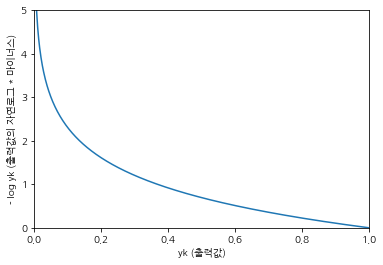

In [4]:
y = - np.log(x + 1e-7)

plt.plot(x, y)
plt.ylim(0, 5)
plt.xlim(0, 1)
plt.xlabel("yk (출력값)")
plt.ylabel("- log yk (출력값의 자연로그 * 마이너스)")

- \[expression 4.2]은 $\log$ 값에 마이너스(-)를 곱해서 위의 그림과 같은 그래프가 됨
- 정답에 해당하는 출력($y_k$)이 커질수록 0에 가까워지다가, 그 출력이 1일 때 0 이 됨 (손실함수 E 가 최소가 됨)

In [5]:
# 교차 엔트로피 오차 구현
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))   # np.log 계산 결과가 마이너스 무한대(-inf) 값이 되는 것을 막기 위해 아주 작은 값(0.0000001)

In [6]:
# 임의의 데이터 예 (정답은 2, 추정은 인덱스 2를 가장 큰 값인 0.6으로 추정)
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

print(cross_entropy_error(y, t))

# 임의의 데이터 예 (정답은 2, 추정은 인덱스 7를 가장 큰 값인 0.6으로 추정)
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])

print(cross_entropy_error(y, t))

0.510825457099338
2.302584092994546


- 위에서, 첫번째 예의 교차 엔트로피 오차가 두번째 예의 교차 엔트로피 오차 보다 작아서 추정결과가 더 정답에 가까운 것으로 판단할 수 있음

---
- **전체 훈련 데이터 셋에 대한 손실 함수(교차 엔트로피 오차)의 합**
> $E = - \frac{1}{N} \sum\limits_{n=0}^{N} ( \sum\limits_{k=0}^{m} t_{nk} \log y_{nk} )$
> - $N$은 입력 데이터 수, $n$은 입력 데이터 중 n번째 데이터, $k$는 n번째 데이터에 대한 정답 레이블(또는 추정 값)의 k 번째 차원
> - $y_{nk}$는 신경망의 출력(n번째 데이터에 대한 k번째 차원의 값), $t_{nk}$는 정답 레이블(n번째 데이터에 대한 k번째 차원의 값)
> - $m$은 데이터 셋 하나의 차원 수(one-hot encoding 값의 인덱스 수), $log$는 밑이 $e$인 자연로그($\log_e$)
> - **데이터 셋 별로 손실 함수를 계산 후, $N$으로 나눔으로써 전체 데이터 셋에 대한 "평균 손실 함수"를 구함**

- **미니 배치(mini-batch) 학습** : 데이터 셋이 많은 경우, 훈련 데이터 중 일부 만을 이용하여 전체의 '근사치'를 학습하는 방법

In [8]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(X_train, t_train), (X_test, t_test) = load_mnist(normalize=True, one_hot_label=True)    # 정답 레이블을 one-hot encoding 형태로 읽어옴(정답 레이블 만 1, 나머지는 0)

print(X_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)
